## Logistic Regression

In [28]:
### Libraries to be imported
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [16]:
### Dataset we will be using
data = pd.read_csv('../Datasets/featured.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Month_of_received,hour_of_the_day,...,traffic_HTTP,Attack_Type_DDoS,Attack_Type_Intrusion,Attack_Type_Malware,Severity_High,Severity_Low,Severity_Medium,Segments_Segment A,Segments_Segment B,Segments_Segment C
0,31225,17616,503,1,1,28.67,1,0,5,6,...,1,0,0,1,0,1,0,1,0,0
1,17245,48166,1174,1,1,51.50,1,1,8,7,...,1,0,0,1,0,1,0,0,1,0
2,16811,53600,306,0,1,87.42,0,0,11,8,...,1,1,0,0,0,1,0,0,0,1
3,20018,32534,385,1,0,15.79,0,0,7,10,...,1,0,0,1,0,0,1,0,1,0
4,6131,26646,1462,1,0,0.52,0,0,7,13,...,0,1,0,0,0,1,0,0,0,1


In [23]:
### Training and Testing dataset 
X = data.drop('Malware Indicators', axis = 1)
y = data['Malware Indicators']
RANDOM_SEED = 13
X_train, X_test, y_train , y_test = train_test_split(X,y , test_size=0.2, random_state=RANDOM_SEED)

### In this notebook we will be comparing the logisitc regression and hypertuned logistic regression, based on the outcome required we will be doing threshold tunning to get the perfect output

The precision score of the logit model is 0.49, meaning out of the predicted values 49.46% were right
The recall score of the logit model is 0.49, meaning out of all the positive cases the model predicted 49.46% right
The harmonic mean between precision and recall was 49.46%
The false negative rate of the model is 51.66% out of all the positive cases


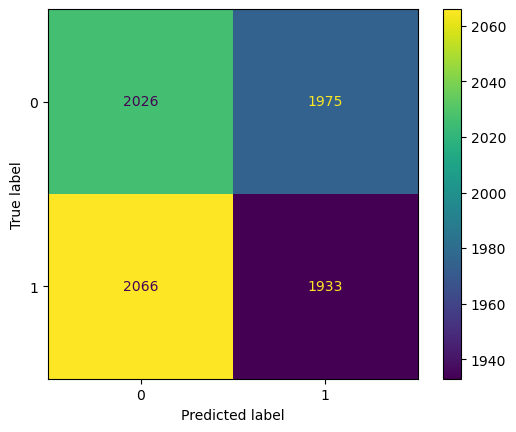

In [36]:
### Basic Logistic Regression Model 
pipeline_steps = [('scalar',StandardScaler()), ('logit_model', LogisticRegression())]
pretuned_model = Pipeline(pipeline_steps)

pretuned_model.fit(X_train,y_train)

training_pred = pretuned_model.predict(X_train)
testing_pred = pretuned_model.predict(X_test)
training_proba = pretuned_model.predict_proba(X_train)[:,1]
testing_proba = pretuned_model.predict_proba(X_test)[:,1]

### Evaluating the model 

training_accuracy_score = accuracy_score(y_train, training_pred)
testing_accuracy_score = accuracy_score(y_test, testing_pred)

## Calculating precision, recall, and f1-score

precision = precision_score(y_test, testing_pred)
print(f"The precision score of the logit model is {precision:.2f}, meaning out of the predicted values {precision*100:.2f}% were right")
recall = precision_score(y_test, testing_pred)
print(f"The recall score of the logit model is {recall:.2f}, meaning out of all the positive cases the model predicted {recall*100:.2f}% right")

f1_score = precision_score(y_test, testing_pred)
print(f"The harmonic mean between precision and recall was {f1_score * 100:.2f}%")
roc_value = roc_auc_score(y_test, testing_proba)

fpr,tpr, threshold = roc_curve(y_test,testing_proba)
### Confusion Matrix and plotting the confusion matrix 

evaluation_matrix = confusion_matrix(y_test, testing_pred)
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test,testing_pred).ravel()

### False Negative Rate: 
false_negative_rate = false_negatives/(false_negatives+ true_positives)
print(f"The false negative rate of the model is {false_negative_rate *100:.2f}% out of all the positive cases")
display = ConfusionMatrixDisplay(confusion_matrix=evaluation_matrix)
display.plot()
